# Задача 2. Вариант 11

# Постановка задачи
Используя метод переменных направлений, решить краевую задачу:
\begin{equation*}
\begin{cases}
   \displaystyle \frac{\partial u}{\partial t} = \Delta u + \sin x \sin y \cdot e^{-t}, \; \; 0 < x < \pi, \; \; 0 < y < \pi, \; \; t > 0\\ 
   u|_{x=0} = u|_{x=\pi} = 0, \\ 
   u|_{y=0} = u|_{y=\pi} = 0, \\
   u|_{t=0} = 0
\end{cases}
\end{equation*}

# Аналитическое решение задачи
Будем искать решение в виде:
$$
u(x,y,t) = \sum_{n=0}^{\infty} \sum_{m=0}^{\infty} R_{nm}(x,y) T_{nm} 
$$
Решая задачу методом разделения переменных, получим:
$$
\displaystyle \frac{T'(t)}{T(t)} = \frac{R''(x,y)}{R(x,y)} = - \lambda
$$
Имеем задачу Штурма-Лиувилля:
$$
\begin{cases}
   R'' + \lambda R = 0 \\
   \displaystyle R|_{x=0} = R|_{x=\pi} = 0 \\
   \displaystyle R|_{y=0} = R|_{y=\pi} = 0 
\end{cases}
$$
Представим функцию $R$ в виде: $R(x,y) = X(x)Y(y)$ и вновь применим метод разделения переменных. Получаем две задачи Штурма-Лиувилля на отрезке:
$$
\begin{cases}
   X'' + \nu R = 0 \\
   X|_{x=0} = X|_{x=\pi} = 0
\end{cases} \Rightarrow X_n = \sin(\pi nx), \; \nu_n = (\pi n)^2, \;n=1,2,...
$$


$$
\begin{cases}
   Y'' + \mu R = 0 \\
   \displaystyle Y|_{y=0} = Y|_{y=\pi} = 0 
\end{cases} \Rightarrow Y_m = \sin(\pi my), \; \mu_m = (\pi m)^2, \;m=1,2,...
$$
Получаем набор собственных функций:
$$
R_{nm} = \sin(\pi nx) \sin(\pi my), \; \lambda_{nm} = \nu_n + \mu_m 
$$
%Тогда решение $u(x,y,t)$ представляется в виде:
$$
%u(x,y,t) = \sum_{n=0}^{\infty} \sum_{m=0}^{\infty} R_{nm}(x,y) T_{nm} e^{-\lambda t}
$$
Для $T_{nm}$ имеем задачу Коши:
$$
\begin{cases}
   \displaystyle \frac{dT}{dt} + \lambda T = f(t) \\
   T|_{t=0} = 0
\end{cases} 
$$
Найдем явный вид функции $f(t)$:
$$
f_{nm} = \frac{1}{\parallel V_{nm} \parallel ^2} \int \int_D F(x,y,t) R_{nm}(x,y)dxdy, \; \parallel R_{nm} \parallel ^2 = 
$$

=======ДОДЕЛАТЬ=======

# Численное решение. Схема переменных направлений
Для применения схемы введем в расчетной области $\Omega = G \bigotimes [0,T]$ двумерную пространственную и одномерную временную сетку:
$$
G = \{ (x,y): 0 \le x \le \pi, \; o \le y \le \pi \} \\
\overline{w_h} = \{ (x_n,y_m): x_n=nh_x, \; n=\overline{0,N}, \; h_x N=\pi; \; y_m=mh_y, \; m = \overline{0,M}, \; h_y M = \pi \} \\
\overline{w_r} = \{ t_j=j\tau, \; j=\overline{0,J}, \; J\tau = T \}
$$Где $h_x$, $h_y$ и $\tau$ = шаги по координатам $x$, $y$ и $t$. 

Осуществим переход от дифференциальной задачи к разностной следующим образом:
$$
\Delta w^j \rightarrow \Lambda w^j = \Lambda_1 w^j + \Lambda_2 w^j
$$
Для этого на введенной сетке будем рассматривать сеточные функции $w_{n,m}^j$ и заменим дифференциальные операторы 
$
\frac{\partial ^2}{\partial x^2}, \frac{\partial ^2}{\partial y^2}
$
их разностными аналогами:
$$
\displaystyle \Lambda_1 w^j = \frac{w_{n-1,m}^j - 2w_{n,m}^j + w_{n+1,m}^j}{h_{x}^2} \\
\displaystyle \Lambda_2 w^j = \frac{w_{n,m-1}^j - 2w_{n,m}^j + w_{n,m+1}^j}{h_{y}^2}
$$
где $w_{n,m}^j = u(x_n,y_m,t_j)$.

Для решения нашей задачи введем полуцелые слои, каждый из которых расположен
между целыми значениями $j, j+1$. Расстояния между целыми и полуцелыми слоями, соответственно, равны $\frac{\tau}{2}$.

В данной задаче будем рассматривать схему переменных направлений,
являющейся объединением явной и неявной схемы. При переходе со слоя $j$ на $j+1$ будем использовать неявную схему по переменной $x$ и явную схему по переменной $y$. При переходе с полуцелого слоя $j+1/2$ на следующий целый слой $j+1$ будем пользоваться неявной схемой по переменной $y$ и явной по $x$. Таким образом, получаем разностную задачу в виде:
$$
\begin{cases}
    \displaystyle \frac{w_{n,m}^{j+\frac{1}{2}} - w_{n,m}^j}{0,5\tau} = \Lambda_1 w_{n,m}^{j+\frac{1}{2}} + \Lambda_2 w_{n,m}^j \\
    \displaystyle \frac{w_{n,m}^{j+1} - w_{n,m}^{j+\frac{1}{2}}}{0,5\tau} = \Lambda_1 w_{n,m}^{j+1} + \Lambda_2 w_{n,m}^{j+\frac{1}{2}}
\end{cases}
$$
Подробнее:
$$
\begin{cases}
    \displaystyle \frac{w_{n,m}^{j+\frac{1}{2}} - w_{n,m}^j}{0,5\tau} = \frac{w_{n-1,m}^{j+\frac{1}{2}} - 2w_{n,m}^{j+\frac{1}{2}} + w_{n+1,m}^{j+\frac{1}{2}}}{h_{x}^2} + \frac{w_{n,m-1}^j - 2w_{n,m}^j + w_{n,m+1}^j}{h_{y}^2} \\
    \displaystyle \frac{w_{n,m}^{j+1} - w_{n,m}^{j+\frac{1}{2}}}{0,5\tau} = \frac{w_{n-1,m}^{j+1} - 2w_{n,m}^{j+1} + w_{n+1,m}^{j+1}}{h_{x}^2} + \frac{w_{n,m-1}^{j+\frac{1}{2}} - 2w_{n,m}^{j+\frac{1}{2}} + w_{n,m+1}^{j+\frac{1}{2}}}{h_{y}^2}
\end{cases}
$$
Таким образом, рассматривая первое уравнение системы и добавляя к нему граничные условия по $x$, то для каждого из фиксированных значений $𝑦_𝑚$ полученное уравнение можно решить методом прогонки.

Далее, зная значения функции на полуцелых слоях, дополним второе из уравнений
системы граничными условиями по $y$ и аналогично первому случаю, решим для
каждого из фиксированных значениях $𝑥_𝑛$ систему методом прогонки.

Начальные условия нашей задачи аппроксимируются точно:
$$
w_{n,m}^0 = 0, \; n=\overline{0,N}, \; m=\overline{0,M}
$$
Причем в силу однородности начальных условий в задаче, данные условия применимы и для полуцелых слоев.

Граничные условия аппроксимируются на каждом временном слое $j$ следующим
образом:
$$
w_{0,m}^j = 0, w_{N, m}^j = 0, \; m=\overline{0,M} \\
w_{n,0}^j = 0, w_{n, M}^j = 0, \; n=\overline{0,N}
$$
Условия Дирихле за счет выбора сетки аппроксимируются с ?????????? порядком
погрешности аппроксимации.

Таким образом, переписывая операторы в явном виде и проделывая математические преобразования, получаем следующее:
$$
\begin{cases}
\displaystyle \frac{1}{2} \gamma_1 w_{n-1,m}^{j+\frac{1}{2}} - (1+\gamma_1)w_{n,m}^{j+\frac{1}{2}} + \frac{1}{2} \gamma_1 w_{n+1,m}^{j+\frac{1}{2}} = - \left( (1-\gamma_2)w_{n,m}^{j} + \frac{1}{2} \gamma_2 \left( w_{n,m-1}^{j} + w_{n,m+1}^{j} \right) \right) = -F_n^x, \; m=\overline{1,M-1} \\
w_{0,m}^j = 0, w_{N, m}^j = 0, \; m=\overline{0,M} \\
\displaystyle \frac{1}{2} \gamma_2 w_{n,m-1}^{j+1} - (1+\gamma_2)w_{n,m}^{j+1} + \frac{1}{2} \gamma_2 w_{n,m+1}^{j+1} = - \left( (1-\gamma_1)w_{n,m}^{j+\frac{1}{2}} + \frac{1}{2} \gamma_1 \left( w_{n-1,m}^{j+\frac{1}{2}} + w_{n+1,m}^{j+\frac{1}{2}} \right) \right) = -F_m^y, \; n=\overline{1,N-1} \\
w_{n,0}^j = 0, w_{n, M}^j = 0, \; n=\overline{0,N}
\end{cases}
$$
где $\gamma_1 = \frac{\tau}{h_x^2}$, $\gamma_2 = \frac{\tau}{h_y^2}$.

Если ввести коэффициенты
$$
A_x = B_x = \frac{1}{2} \gamma_1, C_x = 1+\gamma_1 \\ A_y = B_y = \frac{1}{2} \gamma_2, C_y = 1+\gamma_2
$$
то можно получить систему уравнений, которая решается с помощью метода прогонки.

# Метод прогонки
Пусть необходимо решить следующую систему алгебраических уравнений с постоянными коэффициентами. Рассмотрим систему:
$$
\begin{cases}
    A_n W_{n-1} - C_n W_n + B_n W_{n+1} = -F_n, \; n=\overline{1,N-1} \\
    W_0 = p_1 W_1 + q_1, W_N = p_2 W_{N-1} + q_2
\end{cases}
$$
Для устойчивости метода необходимо выполнение следующего требования:
$$
|C_n| > |A_n|+|B_n|, \; 0 \le p_{1,2} \le 1 || |C_n| \ge |A_n|+|B_n|, \; 0 \le p_{1,2} < 1
$$
Для решения системы положим, что значения искомой функции в двух соседних
точках связаны линейным соотношением:
$$
W_n = \alpha_{n+1} W_{n+1} + \beta_{n+1}
$$
где $\alpha$, $\beta$ - прогоночные коэффициенты.

Для определения коэффциеинтов выразим $W_{n-1}$ и $W_n$ через $W_{n+1}$ и подставим в систему. Тогда получим рекуррентные соотношения для определения коэффициентов:
$$
\alpha_{n+1} = \frac{B_n}{C_n-A_n \alpha_n} , \; \beta_{n+1} = \frac{F_n + A_n \beta_n}{C_n - A_n \alpha_n}
$$
Из граничного условия $W_0 = p_1 W_1 + q_1 = W_1$ получаем:
$$
p_1 = \alpha_1 = 1, \; q_1 = \beta_1 = 0
$$
Используя рекуррентные соотношения, определим остальные прогоночные коэффициенты, делая прогонку в направлении возрастания индекса: вычисление
коэффициентов $\alpha_{n+1}$ и $\beta_{n+1}$. Зная эти коэффициенты и используя ГУ $W_N = p_2 W_{N-1} + q_2 = W_{N-1}$, получаем: $p_2=1$, $q_2=0$.

Тогда
$$
W_N = \frac{q_2 + \beta_N p_2}{1 - \alpha_N}
$$
Обратный ход прогонки: по известным $W_N$ и $\alpha_{n+1}$, $\beta_{n+1}$ совершаем обратную прогонку в направлении уменьшения значений индекса, определяя значения $W_n$ по формуле $W_n = \alpha_{n+1} W_{n+1} + \beta{n+1}$.

Заметим, что достаточные условия устойчивости выполняются:
$$
|A_n|+|B_n|=\gamma_1 < 1+\gamma_1 = |C_n|, \; n=\overline{1,N-1}
$$
Для перехода со слоя $j+1/2$

In [53]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:
Nx, Ny, M = 100, 100, 60 # steps
T = 2 # макс время

x0, x1 = 0, np.pi
y0, y1 = 0, np.pi
t0, t1 = 0, 1

x = np.linspace(x0, x1, Nx)
y = np.linspace(y0, y1, Ny)
t = np.linspace(t0, t1, M)

h_x = x[1] - x[0]
h_y = y[1] - y[0]
τ = t[1] - t[0]
#print(h_x, h_y, τ)

#h_x = (x1 - x0)/(Nx - 1)
#h_y = (y1 - y0)/(Ny - 1)
#τ = (t1 - t0)/(M - 1)
#print(h_x, h_y, τ)

gamma_x = τ/h_x**2
gamma_y = τ/h_y**2

u = np.zeros((Nx, Ny, 2*M + 1)) 

In [44]:
def F_1(i1, i2, j):
    return 0.5*gamma_y*(u[i1,i2-1,j-1] + u[i1,i2+1,j-1]) + (1-gamma_y)*u[i1,i2,j-1] + 0.5*τ*np.exp(τ*(j-1)/2)*(x[i1]**2-1)*np.cos(y[i2])

def F_2(i1, i2, j):
    return 0.5*gamma_x*(u[i1-1,i2,j-1] + u[i1+1,i2,j-1]) + (1-gamma_x)*u[i1,i2,j-1] + 0.5*τ*np.exp(τ*(j-1)/2)*(x[i1]**2-1)*np.cos(y[i2])

def F_11_1(i1, i2, j):
    return 0.5*gamma_y*(u[i1,i2-1,j-1] + u[i1,i2+1,j-1]) + (1-gamma_y)*u[i1,i2,j-1] + 0.5*τ*np.exp(τ*(j-1)/2)*(x[i1]**2-1)*np.cos(y[i2])

def progonka_x(i2,j):
    d = np.zeros(Nx)
    sigma = np.zeros(Nx)
    d[1], sigma[1] = 0, 0
    
    A = 0.5 * gamma_x
    B = 1 + gamma_x
    C = 0.5 * gamma_x
    
    for m in range(1,Nx-1):
        Fm = - F_1(m, i2, j)
        d[m+1] = C / (B - A*d[m])
        sigma[m+1] = (Fm - A*sigma[m]) / (A*d[m] - B)
        
    u[Nx-1,i2,j] = 0
    
    for m in range(Nx-1,0,-1):
        u[m-1,i2,j] = d[m]*u[m,i2,j] + sigma[m]
    
    
def progonka_y(i1,j):
    d = np.zeros(Ny)
    sigma = np.zeros(Ny)
    d[1], sigma[1] = 1, 0 # из НУ
    
    A = 0.5 * gamma_y
    B = 1 + gamma_y
    C = 0.5 * gamma_y
    
    for m in range(1,Ny-1):
        Fm = - F_2(i1, m, j)
        d[m+1] = C / (B - A*d[m])
        sigma[m+1] = (Fm - A*sigma[m]) / (A*d[m] - B)
        
    u[i1,Ny-1,j] = sigma[-1]/(1-d[-1]) # [-1] - обращение к посл элементу массива
    
    for m in range(Ny-1,0,-1):
        u[i1,m-1,j] = d[m]*u[i1,m,j] + sigma[m]
    
    
    
    
    

In [45]:
u[:,:,0] = 0 # НУ

In [46]:
for j in range(1,2*M,2):
    for i2 in range(1,Ny-1):
        progonka_x(i2,j) # переход на слой j+1/2
    
    for i1 in range(1,Nx-1):
        progonka_y(i1,j+1) # переход на слой j+1


<ipython-input-47-762cd94d2769>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(y,x,u[:,:,-1])


Text(0.5, 1.0, 'Значение функции u  в момент времени t = 2')

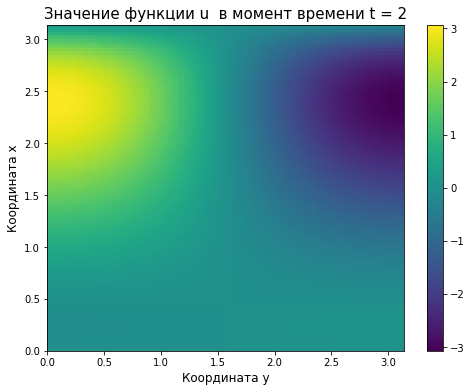

In [47]:
fig = plt.figure(figsize = (8,6))
plt.pcolormesh(y,x,u[:,:,-1])
plt.colorbar()
plt.ylabel('Координата x', fontsize = 12)
plt.xlabel('Координата y', fontsize = 12)
plt.title('Значение функции u  в момент времени t = '+str(T), fontsize = 15)

<ipython-input-48-762cd94d2769>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(y,x,u[:,:,-1])


Text(0.5, 1.0, 'Значение функции u  в момент времени t = 2')

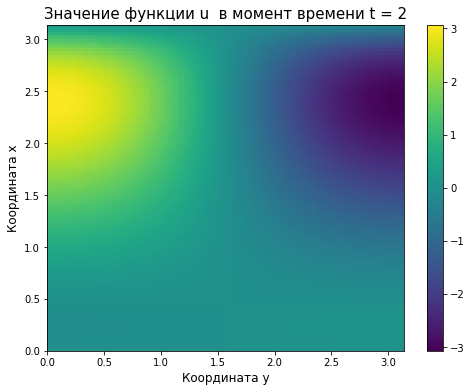

In [48]:
fig = plt.figure(figsize = (8,6))
plt.pcolormesh(y,x,u[:,:,-1])
plt.colorbar()
plt.ylabel('Координата x', fontsize = 12)
plt.xlabel('Координата y', fontsize = 12)
plt.title('Значение функции u  в момент времени t = '+str(T), fontsize = 15)

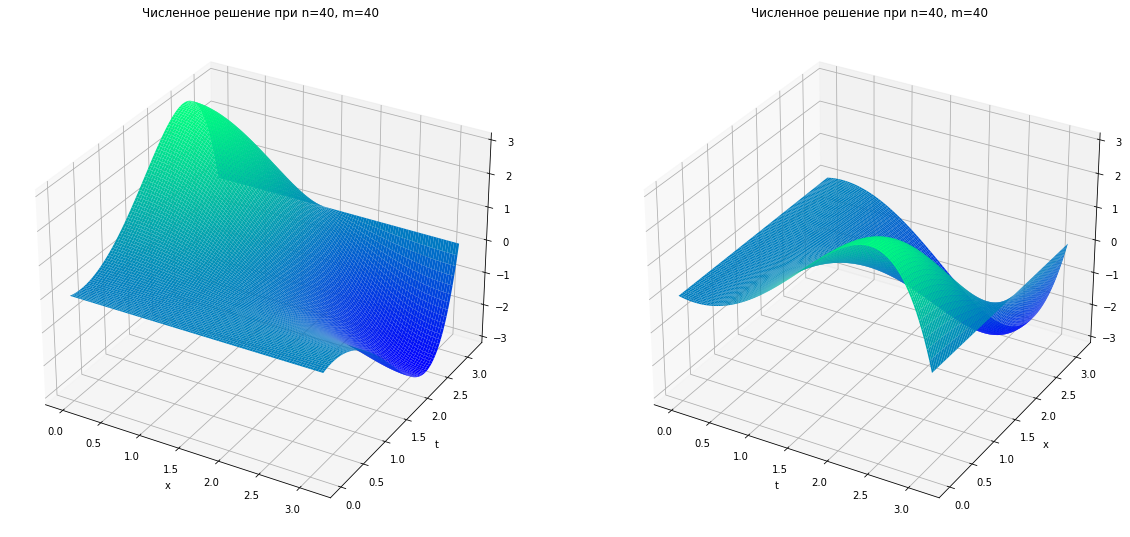

In [49]:
fig = plt.figure(figsize=(20,10))
y, x = np.meshgrid(y, x)
ax = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax.plot_surface(y, x, u[:,:,-1], rstride=1, cstride=1, cmap='winter')
plt.ylabel('t')
plt.xlabel('x')
plt.title('Численное решение при n=40, m=40')
ax = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax.plot_surface(x, y, u[:,:,-1], rstride=1, cstride=1, cmap='winter')
plt.ylabel('x')
plt.xlabel('t')
plt.title('Численное решение при n=40, m=40')

plt.show()